# Atividade - Semana 6

### Limiarização de uma imagem

Utilizaremos a imagem "kodim23" que já foi utilizada em atividade anterior.

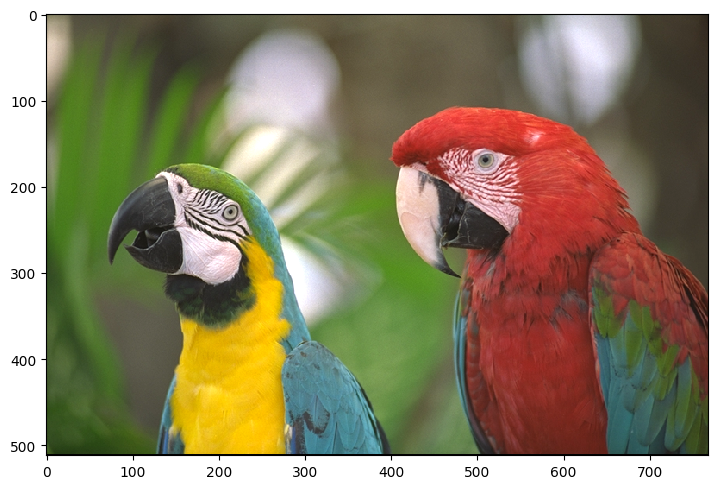

In [1]:
import skimage
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))

image = skimage.io.imread("kodim23.png")
skimage.io.imshow(image)

Para realizar a limiarização, aplicaremos primeiro a trnsformação da imagem para grayscale, e então aplicaremos a limiaridade no resultado.

Aplicando os operadores maior ou menor (>,<) para cada pixel, juntamente da função limiar50porCent, obtemos o seguinte resultado:

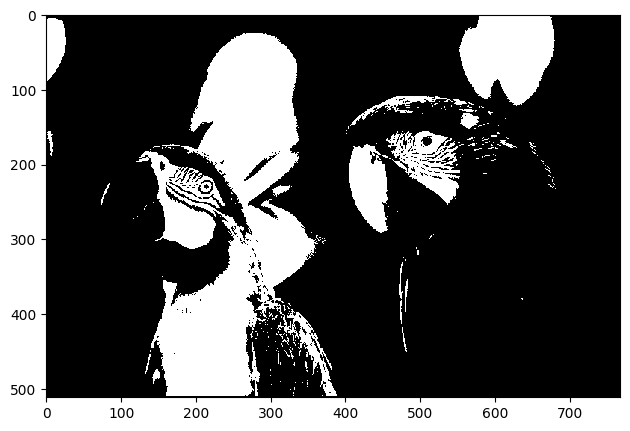

In [2]:
def grayscale(img_color):
    img_grayscale = np.ndarray((len(img_color), len(img_color[0]))) 
    for l in range(0, len(img_color)):
        for p in range(0, len(img_color[l])): 
            pixel = img_color[l][p] 
            img_grayscale[l][p] = pixel.sum() / 3 
    return img_grayscale

grayscale_image = grayscale(image)

limiar50porCent = (grayscale_image > 128)
limiar50porCent.astype(int)
skimage.io.imshow(limiar50porCent, cmap = "gray", vmin=0, vmax=1)

### Plotar o histograma de uma imagem tons de cinza usando Python, scikit-image e matplotlib.

O Scikit-image possui uma função para geração do histograma, histogram, a partir da utilização do módulo exposure.

A função de rgb2gray também foi utilizada para deixar a imagem em tons de cinza, conforme solicitado no exercício.

Text(0.5, 1.0, 'Histograma')

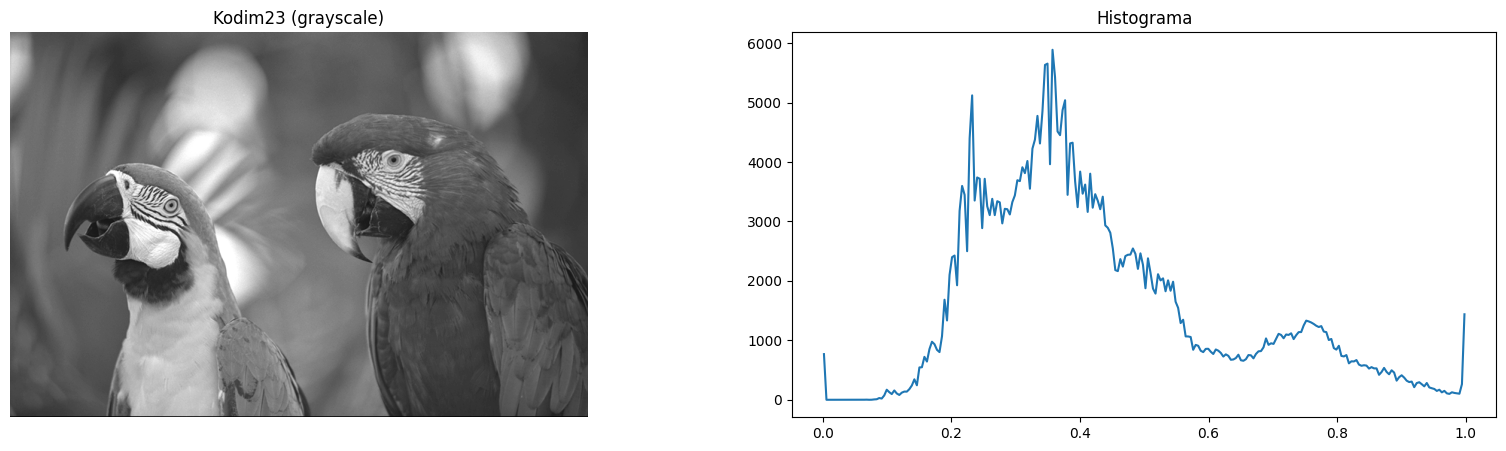

In [4]:
grayscale_image = skimage.color.rgb2gray(image)
histogram, histogram_centers = skimage.exposure.histogram(grayscale_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(grayscale_image, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Kodim23 (grayscale)")
ax[1].plot(histogram_centers, histogram)
ax[1].set_title('Histograma')

### Plotar o histograma de uma imagem colorida (um histograma por canal de cor) usando Python, scikit-image e matplotlib.

Para a geração ddos histogramas para cada canal de cor, foi utilizada a técnica de slicing para extração dos valores dos canais de cores, para então criar 3 imagens nos diferentes canais de cores (azul, vermelho e verde) e a partir disso gerar o histograma de cada imagem.

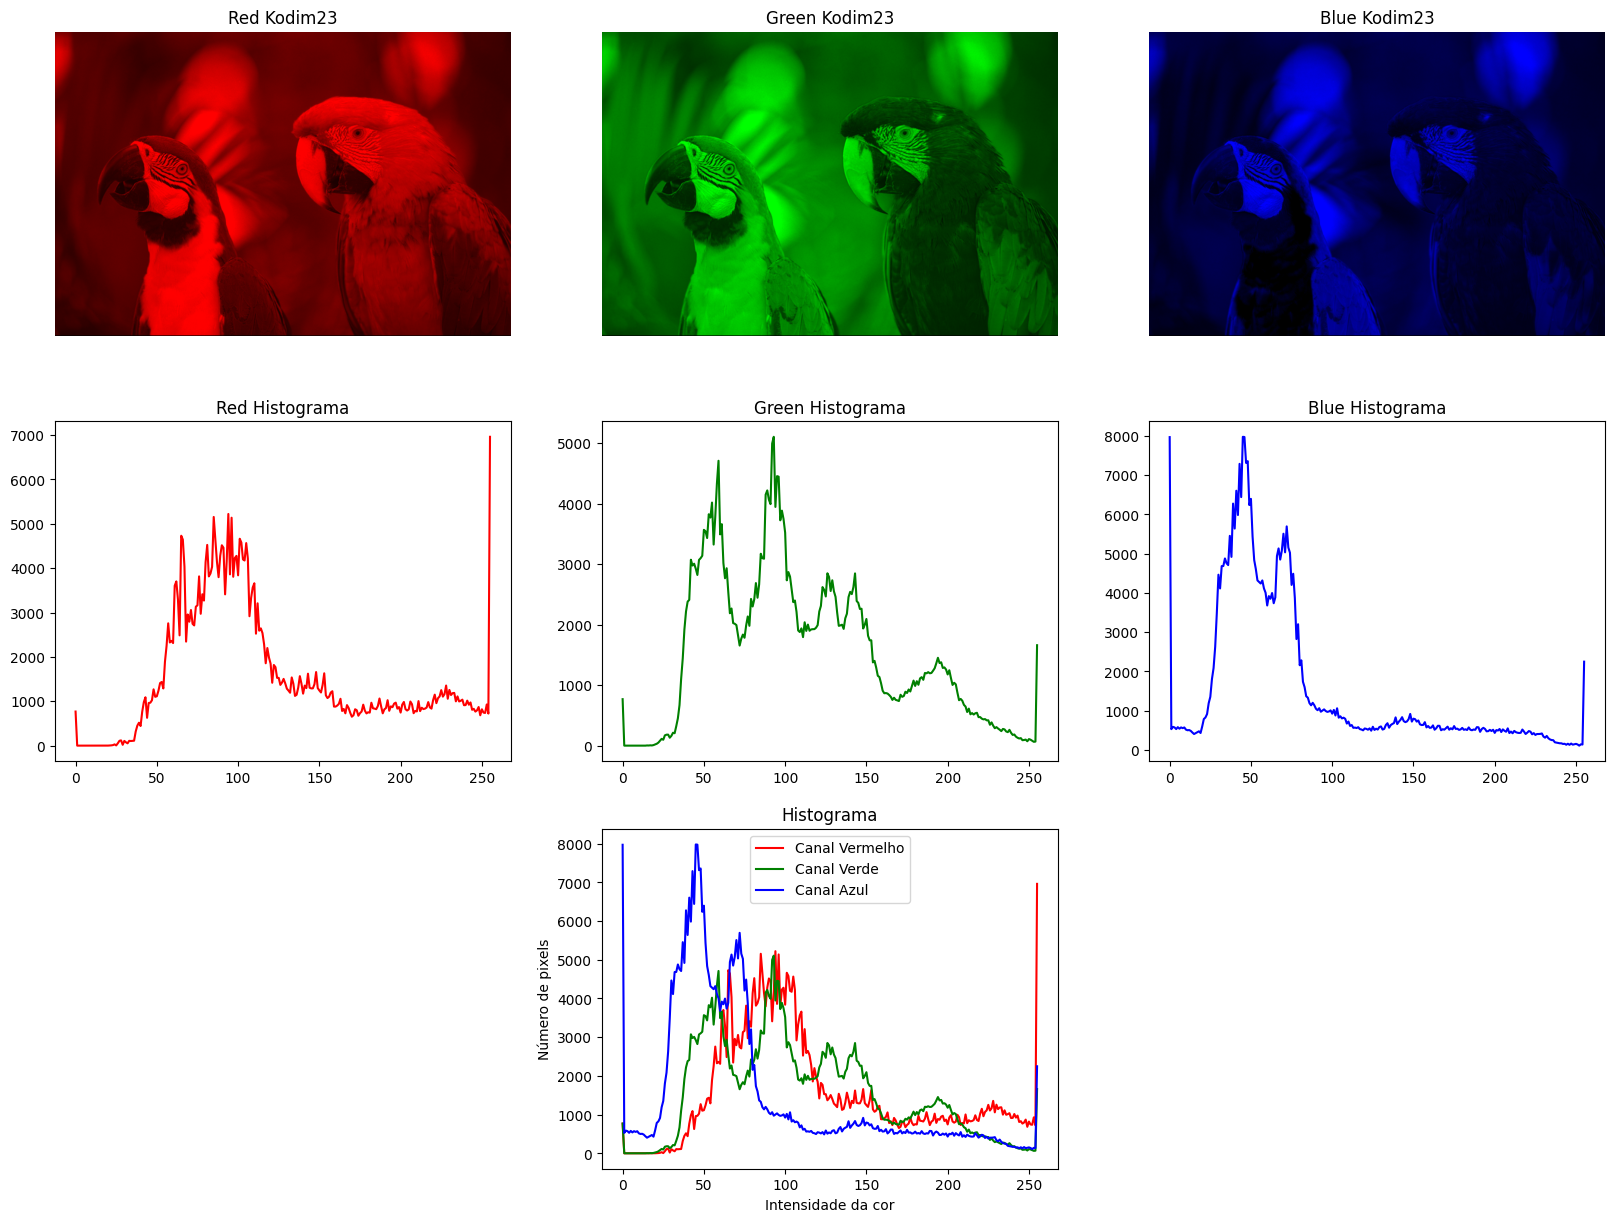

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
channels = ["Red", "Green", "Blue"]

for i in range(3):

    channel = image[:, :, i]
    channelOnlyImages = np.zeros(image.shape, dtype= np.int32)
    channelOnlyImages[:, :, i] = channel

    ax[0][i].imshow(channelOnlyImages)
    ax[0][i].axis("off")
    ax[0][i].set_title(channels[i] + " Kodim23")

    histogram, histogram_centers = skimage.exposure.histogram(channel)
    
    ax[1][i].plot(histogram_centers, histogram, color=channels[i])
    ax[1][i].set_title(channels[i] + ' Histograma')

    ax[2][1].plot(histogram_centers, histogram, color=channels[i])
    ax[2][1].set_title('Histograma')

fig.delaxes(ax[2][0])
fig.delaxes(ax[2][2])
plt.xlabel('Intensidade da cor')
plt.ylabel('Número de pixels')
ax[2][1].legend(['Canal Vermelho', 'Canal Verde', 'Canal Azul'])


### Equalizar o histograma de uma imagem usando Python e scikit-image.

Para a equalização dos histogramas, será utilizada a fução equalize_hist do scikit-image para cada canal de cor/histograma, gerando a imagem a partir dessa equalização.

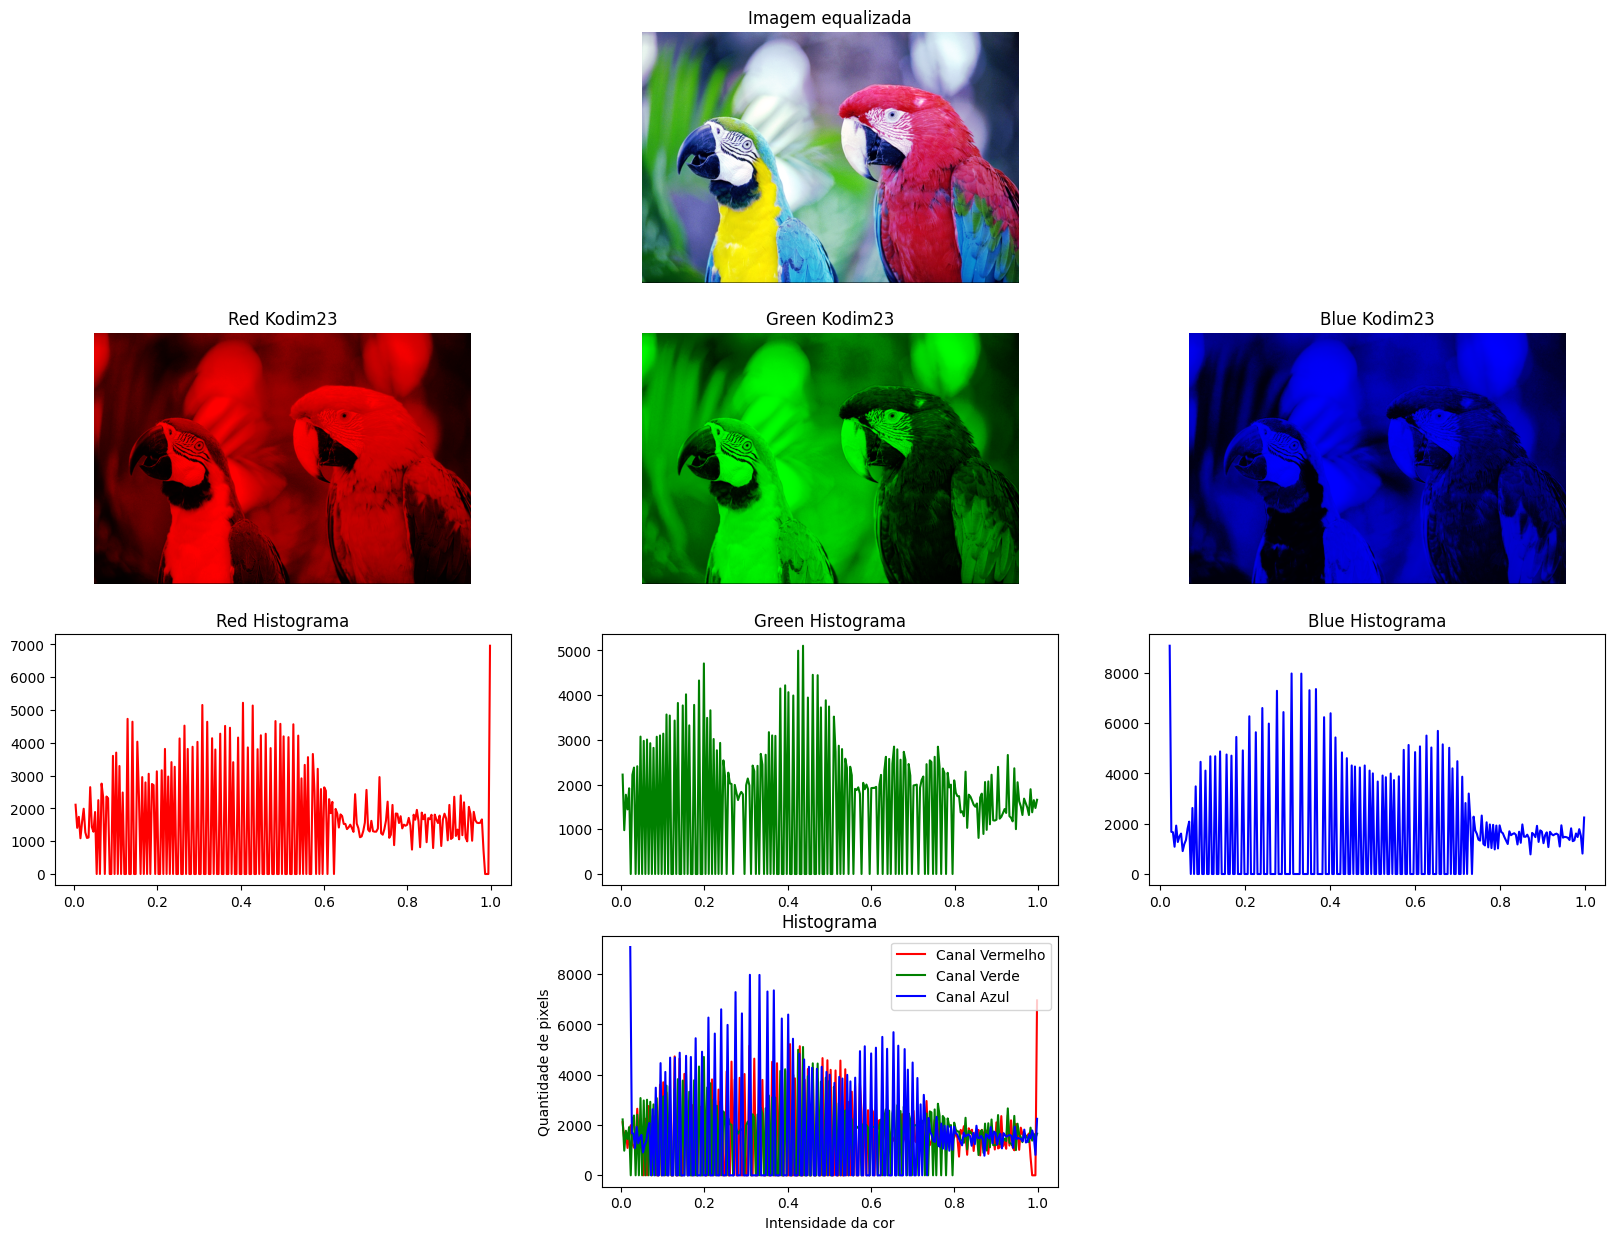

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
channels = ["Red", "Green", "Blue"]

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][2])
fig.delaxes(ax[3][0])
fig.delaxes(ax[3][2])

equalized_img = np.zeros(image.shape, dtype=np.float32)

for i in range(3):

    channel = image[:, :, i]

    channel_equalized = skimage.exposure.equalize_hist(channel)
    histogram, histogram_centers = skimage.exposure.histogram(channel_equalized)

    channelOnlyImages = np.zeros(image.shape, dtype = np.float32)
    channelOnlyImages[:, :, i] = channel_equalized

    ax[1][i].imshow(channelOnlyImages)
    ax[1][i].axis("off")
    ax[1][i].set_title(channels[i] + " Kodim23")

    ax[2][i].plot(histogram_centers, histogram, color=channels[i])
    ax[2][i].set_title(channels[i] + ' Histograma')

    ax[3][1].plot(histogram_centers, histogram, color=channels[i])
    ax[3][1].set_title('Histograma')

    equalized_img[:, :, i] = channel_equalized


ax[0][1].imshow(equalized_img)
ax[0][1].axis("off")
ax[0][1].set_title("Imagem equalizada")

plt.xlabel('Intensidade da cor')
plt.ylabel('Quantidade de pixels')
ax[3][1].legend(['Canal Vermelho', 'Canal Verde', 'Canal Azul'])

### Detectar (concluir) que uma foto está subexposta ou que está superexposta, analisando o histograma.


Para detectar se uma imagem está subexposta ou superexposta, procuramos verificar o histograma tentando identificar se as regiões de maior intensidade estão superexpostas (cortadas), ou se estão subexpostas (frequências baixas), utilizando a função rescale_intensity do scikit-image.

Text(0.5, 1.0, 'Histograma')

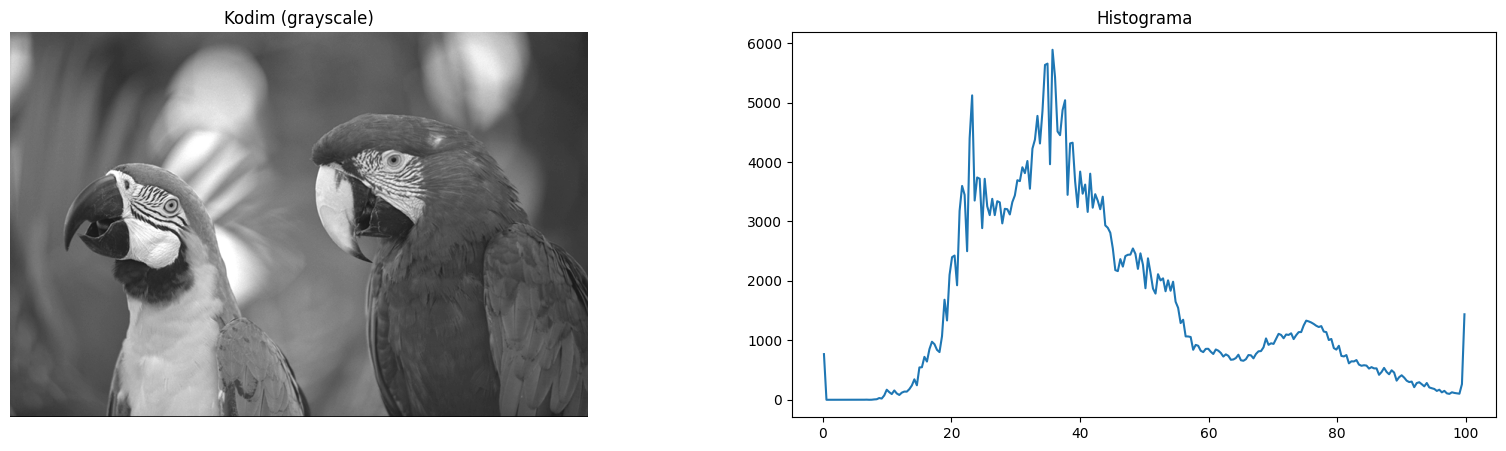

In [13]:

import skimage
import numpy as np
from matplotlib import pyplot as plt

image = skimage.io.imread("kodim23.png")

grayscale_image = skimage.color.rgb2gray(image)

img_underexposed = skimage.exposure.rescale_intensity(grayscale_image, out_range=(0,100))

histogram, histogram_centers = skimage.exposure.histogram(img_underexposed)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(img_underexposed, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Kodim (grayscale)")
ax[1].plot(histogram_centers, histogram)
ax[1].set_title('Histograma')

### Detectar (concluir) se uma imagem está com baixo contraste ou alto contraste, analisando o histograma.

Para a detecção de baixo e alto contraste, será utilizada uma função booleana, is_low_contrast do scikit-image, para a análise do histograma e verificação da formação de picos ou vales, indicando true se a imagem está com baixo contraste ou false se estiver com alto contraste.

In [14]:
skimage.exposure.is_low_contrast(image)

False

## Referências

https://scikit-image.org/ 

https://pypi.org/project/scikit-image/

https://acervolima.com/processamento-de-imagens-com-scikit-image-em-python/

https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm 

https://datacarpentry.org/image-processing/07-thresholding/

https://www.cambridgeincolour.com/pt-br/tutoriais/histograms1.htm

https://www.geeksforgeeks.org/getting-started-scikit-image-image-processing-python/